In [147]:
import requests
import pandas as pd

In [148]:
import config

In [149]:
data2019 = requests.get(f'https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP&for=state:*&NAICS2017=00&key={config.apiKey}').json()

In [150]:
data2020 = requests.get(f'https://api.census.gov/data/2019/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP&for=state:*&NAICS2017=00&key={config.apiKey}').json()

In [151]:
companysummarystate2019 = pd.DataFrame (data2019[1:], columns= data2019[0])

In [152]:
companysummarystate2020 = pd.DataFrame(data2020[1:], columns = data2020[0])

In [153]:
companysummarystate2019.drop(columns = ['GEO_ID','NAICS2017_LABEL','NAICS2017','state'], inplace=True)

In [154]:
companysummarystate2020.drop(columns = ['GEO_ID','NAICS2017_LABEL','NAICS2017','state'], inplace=True)

In [155]:
companysummarystate2019.head()

,NAME,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP
0,Mississippi,002,029,00,003,0
1,Mississippi,003,029,00,003,466
2,Mississippi,004,029,00,003,572
3,Mississippi,001,001,30,003,926
4,Mississippi,096,096,96,096,37489


In [156]:
companysummarystate2020.head()

,NAME,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP
0,Mississippi,001,028,00,001,93
1,Mississippi,003,028,00,001,0
2,Mississippi,002,029,50,001,0
3,Mississippi,003,029,50,001,51
4,Mississippi,001,001,60,001,2489


In [157]:
companysummarystate2019.FIRMPDEMP.isna().value_counts()

False    9668
Name: FIRMPDEMP, dtype: int64

In [158]:
companysummarystate2020.FIRMPDEMP.isna().value_counts()

False    9641
Name: FIRMPDEMP, dtype: int64

In [159]:
statemerge = companysummarystate2019.merge(companysummarystate2020, on=['NAME', 'SEX', 'ETH_GROUP', 'RACE_GROUP', 'VET_GROUP'], how='inner', suffixes = ('_2019', '_2020') )

The totals for each column are 001, except Race_Group which is 00.
Make sure that you filter for totals on all the other columns except for the ones you are looking at fo

In [160]:
statemerge

,NAME,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP_2019,FIRMPDEMP_2020
0,Mississippi,003,029,00,003,466,334
1,Mississippi,004,029,00,003,572,0
2,Mississippi,001,001,30,003,926,801
3,Mississippi,096,096,96,096,37489,37057
4,Mississippi,002,001,00,001,6659,7751
...,...,...,...,...,...,...,...
9133,Minnesota,002,029,00,003,0,0
9134,Minnesota,003,029,00,003,941,1128
9135,Minnesota,004,029,00,003,0,1877
9136,Minnesota,001,001,30,003,0,3025


In [161]:
pd.options.mode.chained_assignment = None

In [162]:
statemerge['FIRMPDEMP_2020'] = pd.to_numeric(statemerge['FIRMPDEMP_2020'])

In [163]:
allownedbus = statemerge.loc[(statemerge['SEX'] == '001') & (statemerge['ETH_GROUP'] == '001') & (statemerge['RACE_GROUP'] == '00') & (statemerge['VET_GROUP'] == '001')]

In [164]:
womenownedbus = statemerge.loc[(statemerge['SEX'] == '002') & (statemerge['ETH_GROUP'] == '001') & (statemerge['RACE_GROUP'] == '00') & (statemerge['VET_GROUP'] == '001')]

In [165]:
womenownedbus = womenownedbus.join(allownedbus.set_index('NAME'), on = 'NAME', lsuffix='_left', rsuffix='_right')

In [166]:
womenownedbus['PERCENTAGE_WOMEN_OWNED'] = womenownedbus['FIRMPDEMP_2020_left']/womenownedbus['FIRMPDEMP_2020_right']

In [167]:
topwomenownedbus = womenownedbus.nlargest(n = 5, columns = 'PERCENTAGE_WOMEN_OWNED')

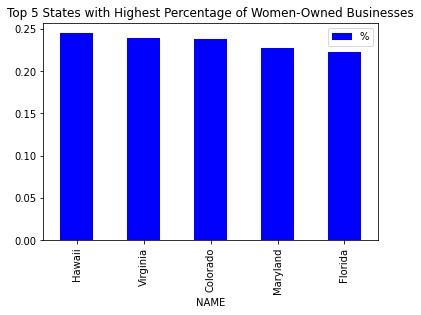

In [168]:
topwomenownedbus.plot(x = 'NAME', y = 'PERCENTAGE_WOMEN_OWNED', kind = 'bar', title = 'Top 5 States with Highest Percentage of Women-Owned Businesses', color = 'blue').legend(['%'])

In [169]:
botwomenownedbus = womenownedbus.nsmallest(n = 5, columns = 'PERCENTAGE_WOMEN_OWNED')

In [170]:
botwomenownedbus = botwomenownedbus.iloc[::-1]

In [171]:
botwomenownedbus

,NAME,SEX_left,ETH_GROUP_left,RACE_GROUP_left,VET_GROUP_left,FIRMPDEMP_2019_left,FIRMPDEMP_2020_left,SEX_right,ETH_GROUP_right,RACE_GROUP_right,VET_GROUP_right,FIRMPDEMP_2019_right,FIRMPDEMP_2020_right,PERCENTAGE_WOMEN_OWNED
968,New Hampshire,002,001,00,001,5274,4742,001,001,00,001,28969,29727,0.159518
7640,Iowa,002,001,00,001,9759,9466,001,001,00,001,60610,59463,0.159191
6879,Idaho,002,001,00,001,6635,6202,001,001,00,001,39080,41098,0.150908
1877,North Dakota,002,001,00,001,0,2849,001,001,00,001,19844,20010,0.142379
3142,South Dakota,002,001,00,001,3194,2958,001,001,00,001,21641,21798,0.135701


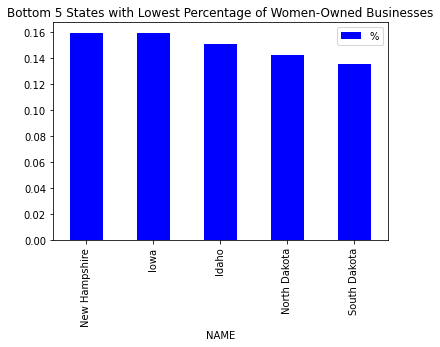

In [172]:
botwomenownedbus.plot(x = 'NAME', y = 'PERCENTAGE_WOMEN_OWNED', kind = 'bar', title = 'Bottom 5 States with Lowest Percentage of Women-Owned Businesses', color = 'blue').legend(['%'])